In [1]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks


2024-04-30 12:19:22.204627: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 12:19:22.204844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 12:19:22.270433: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-30 12:19:22.418619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 12:19:25.222713: W tensorflow/compiler/tf2

In [2]:
# Hàm đọc ảnh từ folder và tiền xử lý
def load_and_preprocess_data(folder_path, img_size=(150, 150)):
    images = []
    labels = []
    label_encoder = LabelEncoder()
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img.astype("float32") / 255.0
            images.append(img)
            labels.append(label)
    labels = label_encoder.fit_transform(labels)
    return np.array(images), np.array(labels)


# Hàm chuẩn hóa dữ liệu
def normalize_data(train_data, val_data, test_data):
    mean = np.mean(train_data, axis=0)
    std = np.std(train_data, axis=0)
    train_data = (train_data - mean) / std
    val_data = (val_data - mean) / std
    test_data = (test_data - mean) / std
    return train_data, val_data, test_data, mean, std


# Hàm giảm chiều dữ liệu bằng PCA
def apply_pca(train_data, val_data, test_data, n_components=225):
    pca = PCA(n_components=n_components)
    pca.fit(train_data)
    train_data_pca = pca.transform(train_data)
    val_data_pca = pca.transform(val_data)
    test_data_pca = pca.transform(test_data)
    return train_data_pca, val_data_pca, test_data_pca, pca

In [3]:
# Load dữ liệu
train_images, train_labels = load_and_preprocess_data("data/train")
val_images, val_labels = load_and_preprocess_data("data/validation")
test_images, test_labels = load_and_preprocess_data("data/test")


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

11.9 GB - 3.3 GB = 8.6 GB load images

In [4]:
# Chuẩn hóa dữ liệu
# train_images, val_images, test_images, mean, std = normalize_data(
#     train_images, val_images, test_images
# )
mean = np.mean(train_images, axis=0)
std = np.std(train_images, axis=0)

12 GB

In [5]:
train_images = (train_images - mean) / std

10.4 GB

In [6]:
val_images = (val_images - mean) / std

9.8 GB (nho tat nhung chuong trinh khac di)

In [7]:
test_images = (test_images - mean) / std

11.3 GB 

In [8]:
train_images.shape

(10000, 150, 150, 3)

In [9]:
# Áp dụng PCA
# train_images_pca, val_images_pca, test_images_pca, pca = apply_pca(
#     train_images.reshape(train_images.shape[0], -1),
#     val_images.reshape(val_images.shape[0], -1),
#     test_images.reshape(test_images.shape[0], -1),
# )
train_images = train_images.reshape(train_images.shape[0], -1)

In [10]:
train_images.shape

(10000, 67500)

10.1 GB

In [11]:
val_images = val_images.reshape(val_images.shape[0], -1)

10.1 GB

In [12]:
test_images = test_images.reshape(test_images.shape[0], -1)
 

10.1 GB

In [13]:
n_components = 225
pca = PCA(n_components=n_components)
pca.fit(train_images) 

PCA(n_components=225)

In [14]:
train_images.shape

(10000, 67500)

10.3 GB, luc chay co len toi 15 GB

In [15]:
train_images = pca.transform(train_images)


In [16]:
train_images.shape


(10000, 225)

8GB

In [17]:
val_images = pca.transform(val_images)


10.4 GB

In [18]:
test_images = pca.transform(test_images)

5.2 GB

In [19]:
# Lưu lại thông tin chuẩn hóa và PCA
with open("preprocessing_info.pkl", "wb") as f:
    pickle.dump((mean, std, pca), f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


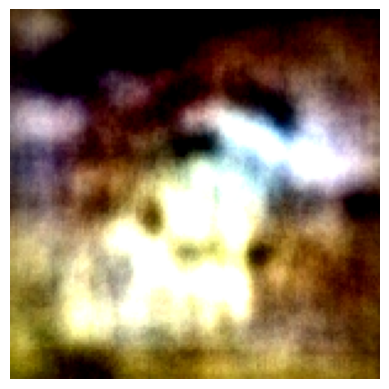

In [21]:
# Hiển thị ảnh sau khi tiền xử lý
def show_preprocessed_image(image, mean, std, pca):
    # Chuẩn hóa ảnh
    # image = (image - mean) / std
    # Áp dụng PCA
    # image_pca = pca.transform(image.reshape(1, -1))
    # Chiều ngược lại từ PCA
    image_inverse = pca.inverse_transform(image)
    # Reshape và hiển thị ảnh
    image_inverse = image_inverse.reshape(150, 150, 3)
    plt.imshow(image_inverse)
    plt.axis("off")
    plt.show()


# Hiển thị một ảnh từ tập dữ liệu sau khi đã tiền xử lý
show_preprocessed_image(train_images[0], mean, std, pca)

3.9 GB

In [40]:
import numpy as np

# Lưu train data
np.save('train_images.npy', train_images)
np.save('train_labels.npy', train_labels)

# Lưu validation data
np.save('val_images.npy', val_images)
np.save('val_labels.npy', val_labels)

# Lưu test data
np.save('test_images.npy', test_images)
np.save('test_labels.npy', test_labels)

In [ ]:
# # Đọc train data
# train_images = np.load('train_images.npy')
# train_labels = np.load('train_labels.npy')

# # Đọc validation data
# val_images = np.load('val_images.npy')
# val_labels = np.load('val_labels.npy')

# # Đọc test data
# test_images = np.load('test_images.npy')
# test_labels = np.load('test_labels.npy')


In [89]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.Dense(256*2, activation="relu"),
        layers.Dropout(0.05),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.05),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.1),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.15),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.15),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.3),
        # layers.Dense(16, activation="relu"),
        # layers.Dropout(0.4),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.45

In [105]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.46

In [111]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.43

In [117]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.54

In [123]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.49

In [129]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.BatchNormalization(),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.5

In [135]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.BatchNormalization(),
        layers.Dense(256*2, activation="relu"),
        layers.Dropout(0.05),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.05),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.15),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.15),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(32, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        # layers.Dense(16, activation="relu"),
        # layers.Dropout(0.4),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.486

In [141]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.BatchNormalization(),
        layers.Dense(256*2, activation="relu"),
        layers.Dropout(0.05),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.15),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.35),
        # layers.Dense(16, activation="relu"),
        # layers.Dropout(0.4),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.487

In [147]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.Dense(256 * 2, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(10, activation="softmax"),
    ]
)
# 0.556

In [153]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.Dense(256 * 2, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.52

In [159]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.Dense(256 * 3, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(256 * 2, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.552

In [165]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.Dense(256 * 2, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.6),
        layers.Dense(10, activation="softmax"),
    ]
)
# accu 0.5

4.3 GB

In [166]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [167]:
# Callback để lưu lại model có accuracy cao nhất trên tập validation
checkpoint = callbacks.ModelCheckpoint(
    "best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max"
)

In [168]:
# Huấn luyện mô hình
history = model.fit(
    train_images,
    train_labels,
    epochs=20,
    validation_data=(val_images, val_labels),
    callbacks=[checkpoint],
)


Epoch 1/20
313/313 [==============================] - 10s 19ms/step - loss: 2.9124 - accuracy: 0.1496 - val_loss: 2.0591 - val_accuracy: 0.2719
Epoch 2/20
  1/313 [..............................] - ETA: 4s - loss: 2.6559 - accuracy: 0.0625

/home/harito/venv/py/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 17ms/step - loss: 2.2900 - accuracy: 0.2142 - val_loss: 1.9526 - val_accuracy: 0.3119
Epoch 3/20
313/313 [==============================] - 5s 15ms/step - loss: 2.1008 - accuracy: 0.2478 - val_loss: 1.9085 - val_accuracy: 0.3227
Epoch 4/20
313/313 [==============================] - 5s 17ms/step - loss: 2.0012 - accuracy: 0.2868 - val_loss: 1.8574 - val_accuracy: 0.3430
Epoch 5/20
313/313 [==============================] - 5s 15ms/step - loss: 1.9237 - accuracy: 0.3071 - val_loss: 1.8268 - val_accuracy: 0.3545
Epoch 6/20
313/313 [==============================] - 5s 16ms/step - loss: 1.8707 - accuracy: 0.3362 - val_loss: 1.8075 - val_accuracy: 0.3641
Epoch 7/20
313/313 [==============================] - 5s 15ms/step - loss: 1.8155 - accuracy: 0.3596 - val_loss: 1.7886 - val_accuracy: 0.3680
Epoch 8/20
313/313 [==============================] - 5s 16ms/step - loss: 1.7713 - accuracy: 0.3729 - val_loss: 1.7695 - val_accuracy: 0.3763
Epoch 9/20

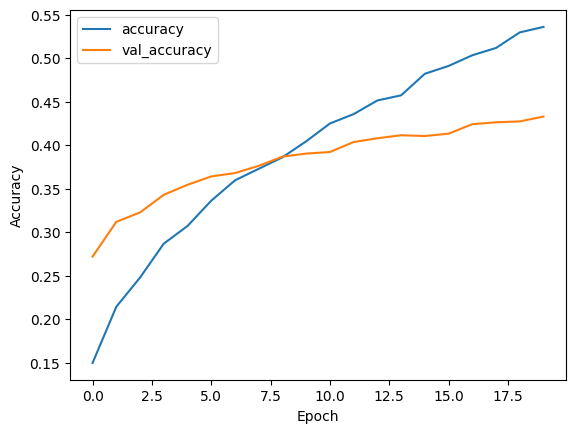

In [169]:
# Biểu đồ lịch sử huấn luyện
def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history)

In [170]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 1s 4ms/step - loss: 1.4968 - accuracy: 0.5036
Test accuracy: 0.503600001335144


In [164]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 1s 6ms/step - loss: 1.6538 - accuracy: 0.5526
Test accuracy: 0.5526000261306763


In [158]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 1s 5ms/step - loss: 1.5322 - accuracy: 0.5286
Test accuracy: 0.5285999774932861


In [152]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 1s 4ms/step - loss: 1.6439 - accuracy: 0.5562
Test accuracy: 0.5562000274658203


In [146]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 1s 4ms/step - loss: 1.6850 - accuracy: 0.4878
Test accuracy: 0.4878000020980835


In [140]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 1s 4ms/step - loss: 1.7717 - accuracy: 0.4870
Test accuracy: 0.4869999885559082


In [134]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 1s 4ms/step - loss: 1.6780 - accuracy: 0.5008
Test accuracy: 0.5008000135421753


In [128]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 0s 2ms/step - loss: 1.6279 - accuracy: 0.4900
Test accuracy: 0.49000000953674316


In [122]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 0s 3ms/step - loss: 1.5702 - accuracy: 0.5412
Test accuracy: 0.5411999821662903


In [116]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 1s 4ms/step - loss: 1.6955 - accuracy: 0.4316
Test accuracy: 0.43160000443458557


In [110]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 0s 2ms/step - loss: 1.7308 - accuracy: 0.4634
Test accuracy: 0.4634000062942505


In [88]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

157/157 [==============================] - 1s 4ms/step - loss: 1.9033 - accuracy: 0.4550
Test accuracy: 0.45500001311302185
